
## Statistical Thinking

Author: Kevin Mntambo 

Description: We take a look at the behavior of different countries over time to help improve environmental     sustainability in accordance to goal 7 of the 8 goals set by The Millennium Development for 2015 that were defined by the United Nations to help improve living conditions and the conditions of our planet. We will have a look at some of the key indicators for this, namely carbon dioxide emissions, protected land and sea areas, and forests.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy.stats import spearmanr
env_sastainability_df = pd.read_csv("../data/MDG_Export_20191227.csv")



In [2]:
env_sastainability_df.head()

,CountryCode,Country,SeriesCode,MDG,Series,1990,Footnotes,Type,1991,Footnotes.1,...,Type.26,2017,Footnotes.27,Type.27,2018,Footnotes.28,Type.28,2019,Footnotes.29,Type.29
0,4,Afghanistan,567,Y,"Proportion of land area covered by forest, per...",2.1,NaN,E,,,...,,,,,,,,,,
1,4,Afghanistan,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",2676.9,NaN,G,2493.6,NaN,...,,,,,,,,,,
2,4,Afghanistan,616,Y,Terrestrial and marine areas protected to tota...,0.36,NaN,C,,,...,,,,,,,,,,
3,8,Albania,567,Y,"Proportion of land area covered by forest, per...",28.8,NaN,C,,,...,,,,,,,,,,
4,8,Albania,749,Y,"Carbon dioxide emissions (CO2), thousand metri...",7488,NaN,G,3971.4,NaN,...,,,,,,,,,,


We can already tell that this data is very dirty and potentially has many missing values.

In [3]:
print(env_sastainability_df.shape)

(690, 95)


We want to gain a basic overview of the shape of the dataset, on the left is the number of rows on the right is the number of columns

In [4]:
len(env_sastainability_df['Country'].unique())


230

The number of countries are a third of the number of the total rows in the dataset, we can see from the snapshot of the data that each country contains three rows separated into diferent series (categories). This is also  surprising since there are about 195 countries recognized by the UN.

In [5]:

#turn all year columns into int64 types, while replacing missing values with Nans.
year = np.arange(start=1990, stop=2020, step=1)
for y in year:
    env_sastainability_df[str(y)] = pd.to_numeric(env_sastainability_df[str(y)], errors='coerce')

#relace all remaining missing values with null.
env_sastainability_df.replace(" ",'NAN',inplace=True)

env_sastainability_df.dtypes

CountryCode       int64
Country          object
SeriesCode        int64
MDG              object
Series           object
                 ...   
Footnotes.28     object
Type.28          object
2019            float64
Footnotes.29     object
Type.29          object
Length: 95, dtype: object

We want to ensure that our data is manipulatable and that we can find all our missing values by turning them into null values.


In [6]:
#find all null values by country
null_val_by_country = env_sastainability_df.set_index('Country').isna().sum(axis=1)
null_val_by_country.groupby(['Country']).sum()

Country
Afghanistan                                       90
Albania                                           90
Algeria                                           90
American Samoa                                    90
Andorra                                           90
                                                  ..
Western Sahara                                    90
Yemen                                             90
Yugoslavia [former Socialist Federal Republic]    90
Zambia                                            90
Zimbabwe                                          90
Length: 230, dtype: int64

There is an equal amount of missing values in each country which suggests that there are about thirty columns that are empty or very close to  empty columns in the data set.

In [7]:
#find all null values by series
nul_val_by_series = env_sastainability_df.set_index('Series').isna().sum(axis=1)
nul_val_by_series.groupby(['Series']).sum()


Series
Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)             6900
Proportion of land area covered by forest, percentage                           6884
Terrestrial and marine areas protected to total territorial area, percentage    6900
dtype: int64

There is a relatively equal amount of missing values in each series  category which further confirms that there are close to 30 columns that are completely empty.

In [8]:
#find all null values by year
Null_val_container = []

#print( env_sastainability_df['1990'].isna().sum())
for y in year:
    Null_val_container.append (env_sastainability_df[str(y)].isnull().sum())

null_val_by_year = np.array( Null_val_container)
null_val_by_year_df = pd.DataFrame({'year': year, 'total': list(null_val_by_year)}, columns=['year','total'])

print(null_val_by_year_df)


    year  total
0   1990     63
1   1991    508
2   1992    486
3   1993    486
4   1994    485
5   1995    483
6   1996    484
7   1997    481
8   1998    481
9   1999    481
10  2000     34
11  2001    479
12  2002    478
13  2003    478
14  2004    478
15  2005    254
16  2006    476
17  2007    475
18  2008    475
19  2009    475
20  2010    252
21  2011    475
22  2012    690
23  2013    690
24  2014    467
25  2015    690
26  2016    690
27  2017    690
28  2018    690
29  2019    690


Most years  have  a lot of missing data , 2000 and 1990 being the most data rich years . We can also see that from 2012 to 2019 with the exception of 2014, these years(columns) had no data at all, they are empty.

In [9]:
env_sastainability_df.drop(env_sastainability_df.columns[env_sastainability_df.columns.str.startswith('Type')],axis=1,inplace=True)
env_sastainability_df.drop(env_sastainability_df.columns[env_sastainability_df.columns.str.startswith('Footnotes')],axis=1,inplace=True)
env_sastainability_df.dropna(axis=1,how='all',inplace=True)

env_sastainability_df.shape

(690, 28)

From the information we've gathered we can now drop all mising values and empty columns.

In [10]:
#find highest polluters of 1990
#np.sort(mgd['1990'])

carbon_emission_sereis_df = env_sastainability_df.loc[env_sastainability_df['Series'] == "Carbon dioxide emissions (CO2), thousand metric tons of CO2 (CDIAC)"]
Top_emitting_countries = carbon_emission_sereis_df.sort_values(by='1990',ascending=False).head()
Top_emitting_countries[['Country','1990','2011']]

,Country,1990,2011
652,United States,4823557.1,5305569.6
124,China,2460744.0,9019518.2
301,Japan,1094287.8,1187657.0
277,India,690576.8,2074344.9
646,United Kingdom,555902.5,448235.7


Here are the top 5 polluting countries in 1990 vs how they were doing in 2011. From the offset, we might expect the CO2 levels to rise exponentially over time, however this table shows that most top emitting countries have been increasing their CO2 footprint, relatively slowly over time, with China being the only exception.

In [11]:
#find lowest polluters of 1990

year_str=[]
for y in year:
    year_str.append(str(y))

#carbs=carb[carb[year_str]>0]
carbon_emiss_sereis_df = carbon_emission_sereis_df[carbon_emission_sereis_df['1990']>0]
low_emitting_countries = carbon_emiss_sereis_df.sort_values(by='1990').head()
    
low_emitting_countries[['Country','1990','2011']]

,Country,1990,2011
445,Niue,3.7,11.0
505,Saint Helena,7.3,11.0
559,Somalia,18.3,575.7
313,Kiribati,22.0,62.3
142,Cook Islands,22.0,69.7


The bottom 5 polluting countries in 1990 vs how they were doing in 2011. Once again, the data shows that most countries show a slow rise in the yearly CO2 emissions over time.

I did spot a problem, Yemen has -2999.6.This seems like an anomaly especially since it is rare to have a negative emission level, a negative so high no less, so I have decided to drop the row.

In [12]:

carbon_emiss_sereis_df['1990'].median()

3100.45

This median seems very low especially when comparing it to the top five emissions in the same year.

In [13]:
carbon_emiss_sereis_df['1990'].mean()

91567.47333333328


The mean and median differ because the dataset is not evenly distributed , it is skewed.
we can see that the mean is much larger than the median of CO2 emissions of 1990, this means distribution is positively skewed


In [14]:
carbon_emiss_sereis_df['1990'].min()

3.7

The minimum seems very low in comparison to all the other numbers compared to the mean and median

In [15]:
carbon_emiss_sereis_df['1990'].max()

4823557.1

The range will be  set is extremly high, very near the the maximum.

In [16]:
carbon_emiss_sereis_df['1990'].quantile()

3100.45

This is a more robust look at the dispersion of the dataset, as we avoid some of the outliers in both the high and low ends

Text(0.5, 0, 'Size')

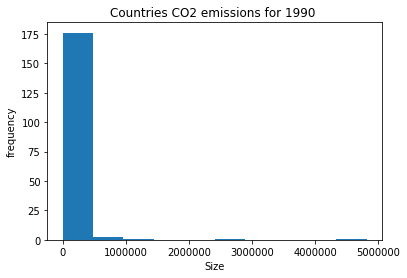

In [17]:
#carb_90=pd.DataFrame(carb)
#carb_90.dropna(subset = ["1990"],inplace=True)
#ax = carb_90['1990'].plot.hist()

ax = carbon_emission_sereis_df['1990'].plot.hist()
plt.title("Countries CO2 emissions for 1990 ") 
plt.ylabel("frequency")
plt.xlabel("Size")



This histogram is suprising in that we might have not expected the majority of of countries to be grouped together around the same area,  The measures of distribution could have us believe that the values would be spread or distributed vastly across the graph, instead it seems that only a few outliers are distorting the general veiw.
 
The vast majority of countries emit less than 500 000 metric tons of CO2, with only a few countries who are outliers, above that threshold.


In [18]:
carbon_emiss_sereis_df['1990'].std()

417851.0567508817

The standard deviation is also extremly high meaning that most values lie really far from the mean. This again might be caused by the extreme values which have distorted the mean and pulled it closer to them so that the lower more common values are further away.

In [19]:
carbon_emiss_sereis_df['1990'].sem()

31144.778912169797


The standard error is very high which means that data set  is not a good  represention  of the overall population.


Text(0.5, 0, 'Year')

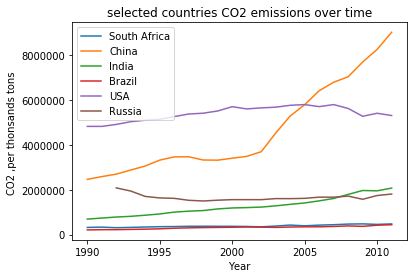

In [20]:

carbon_emission_sereis_SA =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'South Africa']
carbon_emission_sereis_chi =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'China']
carbon_emission_sereis_usa =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'United States']
carbon_emission_sereis_india =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'India']
carbon_emission_sereis_russia =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'Russian Federation']
carbon_emission_sereis_braz =carbon_emission_sereis_df.loc[carbon_emission_sereis_df['Country'] == 'Brazil']


SA= (carbon_emission_sereis_SA.iloc[:, 5:34]).iloc[0]
china= (carbon_emission_sereis_chi.iloc[:, 5:34]).iloc[0]
usa= (carbon_emission_sereis_usa.iloc[:, 5:34]).iloc[0]
india= (carbon_emission_sereis_india.iloc[:, 5:34]).iloc[0]
russia = (carbon_emission_sereis_russia.iloc[:, 5:34]).iloc[0]
brazil = (carbon_emission_sereis_braz.iloc[:, 5:34]).iloc[0]

room= pd.concat([SA, china,india,brazil,usa,russia], axis=1)
room.plot.line()
plt.legend(['South Africa', 'China','India','Brazil','USA','Russia'])
plt.title("selected countries CO2 emissions over time") 
plt.ylabel("CO2 ,per thonsands tons ")
plt.xlabel("Year")

The  highest contributers overtime, are the USA and China. China had a boom in GDP and production from the early 2000s which coincides with its exponential growth in CO2 emissons surpassing even the US by the mid-2000s.
Although the USA has not increased its CO2 emisions over time, the US itself is one of the biggest contributers of CO2 overall over time. Since the 90s it has consistently emitted relatively higher emissions than most countries.

Meanwhile countries like Russia seem to be slowly lowering their emissions and countries like India show a  gradual increase.

Countries like South Africa and Brazil have managed to keep their emissions low and unchanged over the years.

Overall, most countries do not seem to be increasing ther carbon footprint over time. Only China has shown a sharp rise.

In [21]:
land_covered_by_forest=env_sastainability_df.loc[env_sastainability_df['Series'] == "Proportion of land area covered by forest, percentage"]
land_covered_by_forest['1990'].mean()


32.97713004484306

In [22]:
land_covered_by_forest['1990'].std()

25.497512099375246

The standard deviation of th  proportion of land area covered by forest is so large because the data is more spaced out. Therefore, there is more potential for outliers.

Text(0.5, 0, 'Size')

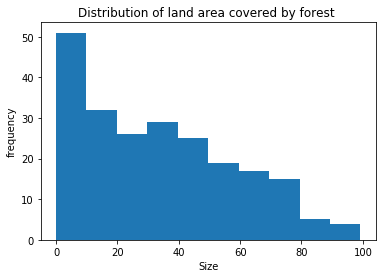

In [23]:
ax = land_covered_by_forest['1990'].plot.hist()
plt.title("Distribution of land area covered by forest ") 
plt.ylabel("frequency")
plt.xlabel("Size")


The graph is positively skewed, basically the larger the area the less common it is.

Text(0.5, 0, 'Size')

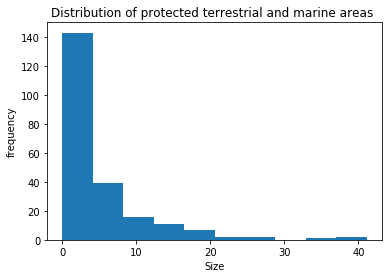

In [24]:
protected_area = env_sastainability_df.loc[env_sastainability_df['Series'] == "Terrestrial and marine areas protected to total territorial area, percentage"]

ax = protected_area['1990'].plot.hist()
plt.title("Distribution of protected terrestrial and marine areas ") 
plt.ylabel("frequency")
plt.xlabel("Size")

The graph is extremly positively skewed, the majority of the data set lies in the first 10% , therefore there seems to be potential outliers beyond this.

Text(0.5, 1.0, 'protected area vs land covered by forest ')

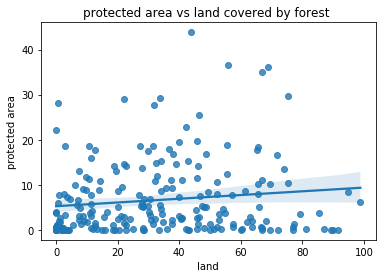

In [25]:

protected_area.reset_index(inplace=True)
land_covered_by_forest.reset_index(inplace=True)
#rel = pd.concat([land_f['2000'],protected_area['2000']],axis=1,keys=['land area', 'protected'])
landForrest_protectedArea_df= pd.DataFrame()
landForrest_protectedArea_df['protected area'] = protected_area['2000']
landForrest_protectedArea_df['land'] = land_covered_by_forest['2000']


sns.regplot('land','protected area' ,data= landForrest_protectedArea_df)
plt.title("protected area vs land covered by forest ")

This is a scatter plot that compares the proportion of land area covered by forest and the percentage of area protected in 2000.
There doesn't seem to be a correlation between the proportion of land area covered by forest and the percentage of area protected. There seems to be many outliers near the x and y margins especially.

/home/kevin/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


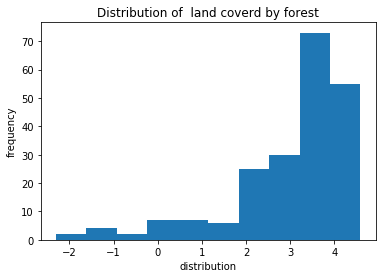

In [26]:

land_covered_by_forest_norm = np.log(landForrest_protectedArea_df['land'])
protected_land_area_norm = np.log(landForrest_protectedArea_df['protected area'])
plt.hist(land_covered_by_forest_norm[np.isfinite(land_covered_by_forest_norm)].values)
#plt.hist(norm_land) 
plt.title("Distribution of  land coverd by forest") 
plt.ylabel("frequency")
plt.xlabel("distribution")
plt.show()

The log transformed land area data is still highly negatively skewed .

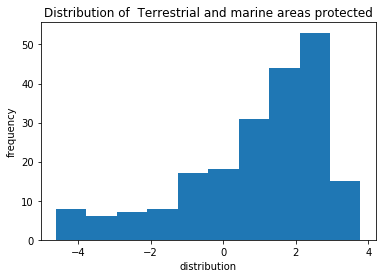

In [27]:
plt.hist(protected_land_area_norm[np.isfinite(protected_land_area_norm)].values)


plt.title("Distribution of  Terrestrial and marine areas protected") 
plt.ylabel("frequency")
plt.xlabel("distribution")
plt.show()

The land area data is negatively skewed, more evenly distributed however.

In [28]:
land_covered_by_forest_norm = land_covered_by_forest_norm [np.isfinite(land_covered_by_forest_norm )].values

protected_land_area_norm =protected_land_area_norm[np.isfinite(protected_land_area_norm)].values

protected_land_area_num=len(protected_land_area_norm)

land_covered_by_forest_norm = land_covered_by_forest_norm[:protected_land_area_num]

pearsonr_coefficient, p_value =pearsonr(land_covered_by_forest_norm,protected_land_area_norm)

print(pearsonr_coefficient)

0.06842339391622292


There is a very small, positive correlation. There is barely any correlation.

In [29]:
coef, p = spearmanr(land_covered_by_forest_norm, protected_land_area_norm)
print(coef)


-0.003457541445173289


The data set has a very small negative correlation. Therefore this confirms that there is no correlation.

The pearson's coefficient has a positve direction while the spearman correlation has a negative direction, however they are both near 0. This confirms that relationship is random or non-existent.

In [30]:
print(p)

0.9605652462908225


The null hypothesis assumes that the relationship between the sets is none existent, the coefficient of the slope = 0. Before we can reliably accept our own or alternate findings, we first have to disprove the null hypothesis .

The p-value is way higher than 0.05, therefore this data set is not statistically significant, we must retain the null hypothesis. This means that the sample data set that we are working with is not a true or a good representation of the general or full population of data.

## Conclusion
Climate change is and is becoming a bigger problem, it may be easy to assume that this problem is caused by a general increase of emissions across all countries over time, however this data set shows us that, in actuality, the majority of countries have relatively low emissions and it's only a few countries that produce most of the carbon emissons, the outliers. Furthermore, most countries are not increasing their carbon footprint at the rate we might expect, most countries actually only show a slight increase over time, if any. Only China seems to have been increasing its emissions at an exponential rate and has become, by far, the largest emitting country. The USA, however, has most likely emitted more total emissons over time since it has been emittimg high levels of CO2 consistently for longer.